In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.metrics import accuracy_score, mean_absolute_error,mean_squared_error
from xgboost import XGBRegressor
from sklearn.ensemble import IsolationForest
from matplotlib.animation import FuncAnimation


FileNotFoundError: [WinError 2] The system cannot find the file specified: 'c:\\Users\\moham\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib.libs'

In [ ]:
data_path = 'data.csv'
data = pd.read_csv(data_path)


In [ ]:
from sklearn.base import TransformerMixin 
class MyLabelEncoder(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelEncoder(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [ ]:
data.describe().median()

Pressure (psi)       405.188989
Temperature (°C)     130.172521
Oil Flow (L/min)      16.619896
Vibration (mm/s)       3.479281
Oil Level (%)         69.575525
Tool RPM (rpm)      2569.561469
Current (A)           52.909403
dtype: float64

In [ ]:
#Data Analysis

data.head()

,Timestamp,Pressure (psi),Temperature (°C),Oil Flow (L/min),Vibration (mm/s),Power Status,Oil Level (%),Tool RPM (rpm),Machine Status,Current (A)
0,17-09-2023 00:00,45.2,29.8,2.4,0.021,ON,73.5,1505,Running,10.3
1,17-09-2023 00:00,48.2,28.8,3.4,0.031,ON,70.5,1805,Running,11.3
2,17-09-2023 00:01,45.1,29.9,2.5,0.022,ON,73.3,1508,Running,10.4
3,17-09-2023 00:01,48.1,28.9,3.5,0.032,ON,70.3,1808,Running,11.4
4,17-09-2023 00:02,45.3,30.0,2.6,0.023,ON,73.2,1512,Running,10.5


In [ ]:
#Preprocess

targets = []
features = ['Pressure (psi)',	'Temperature (°C)',	'Oil Flow (L/min)',	'Vibration (mm/s)'	,'Power Status'	,'Oil Level (%)'	,'Tool RPM (rpm)' ,'Current (A)','Machine Status']

X = data[features]
Y =data[targets]

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)



In [ ]:
num_feat = X.select_dtypes(include=['number']).columns.tolist()
cat_feat = X.select_dtypes(include=['object', 'category']).columns.tolist()


In [ ]:
num_transformer = Pipeline(steps = [('imputer1',SimpleImputer()),('scaler',StandardScaler())])
cat_transformer = Pipeline(steps = [('imputer2',SimpleImputer(strategy='most_frequent')),('encode',OneHotEncoder())])

In [ ]:
model = ()

In [ ]:
preprocess = ColumnTransformer(transformers=[('num',num_transformer,num_feat),('cat',cat_transformer,cat_feat)])
anomaly = Pipeline(steps=[('preprocess',preprocess),('model',IsolationForest(n_estimators=100, contamination=.03))])

In [ ]:
def evaluate(model,X_test,Y_test):
    print(model,':')
    pred = model.fit_predict(X_test)
    print(mean_absolute_error(pred,Y_test))
    print(np.sqrt(mean_squared_error(pred,Y_test)))


In [ ]:
X.head()

,Pressure (psi),Temperature (°C),Oil Flow (L/min),Vibration (mm/s),Power Status,Oil Level (%),Tool RPM (rpm),Current (A),Machine Status
0,45.2,29.8,2.4,0.021,ON,73.5,1505,10.3,Running
1,48.2,28.8,3.4,0.031,ON,70.5,1805,11.3,Running
2,45.1,29.9,2.5,0.022,ON,73.3,1508,10.4,Running
3,48.1,28.9,3.5,0.032,ON,70.3,1808,11.4,Running
4,45.3,30.0,2.6,0.023,ON,73.2,1512,10.5,Running


In [ ]:
anomaly.fit(X_train)

data['scores']=anomaly.decision_function(data[features])
data['anomaly']=anomaly.predict(data[features])
    
    

KeyboardInterrupt: 

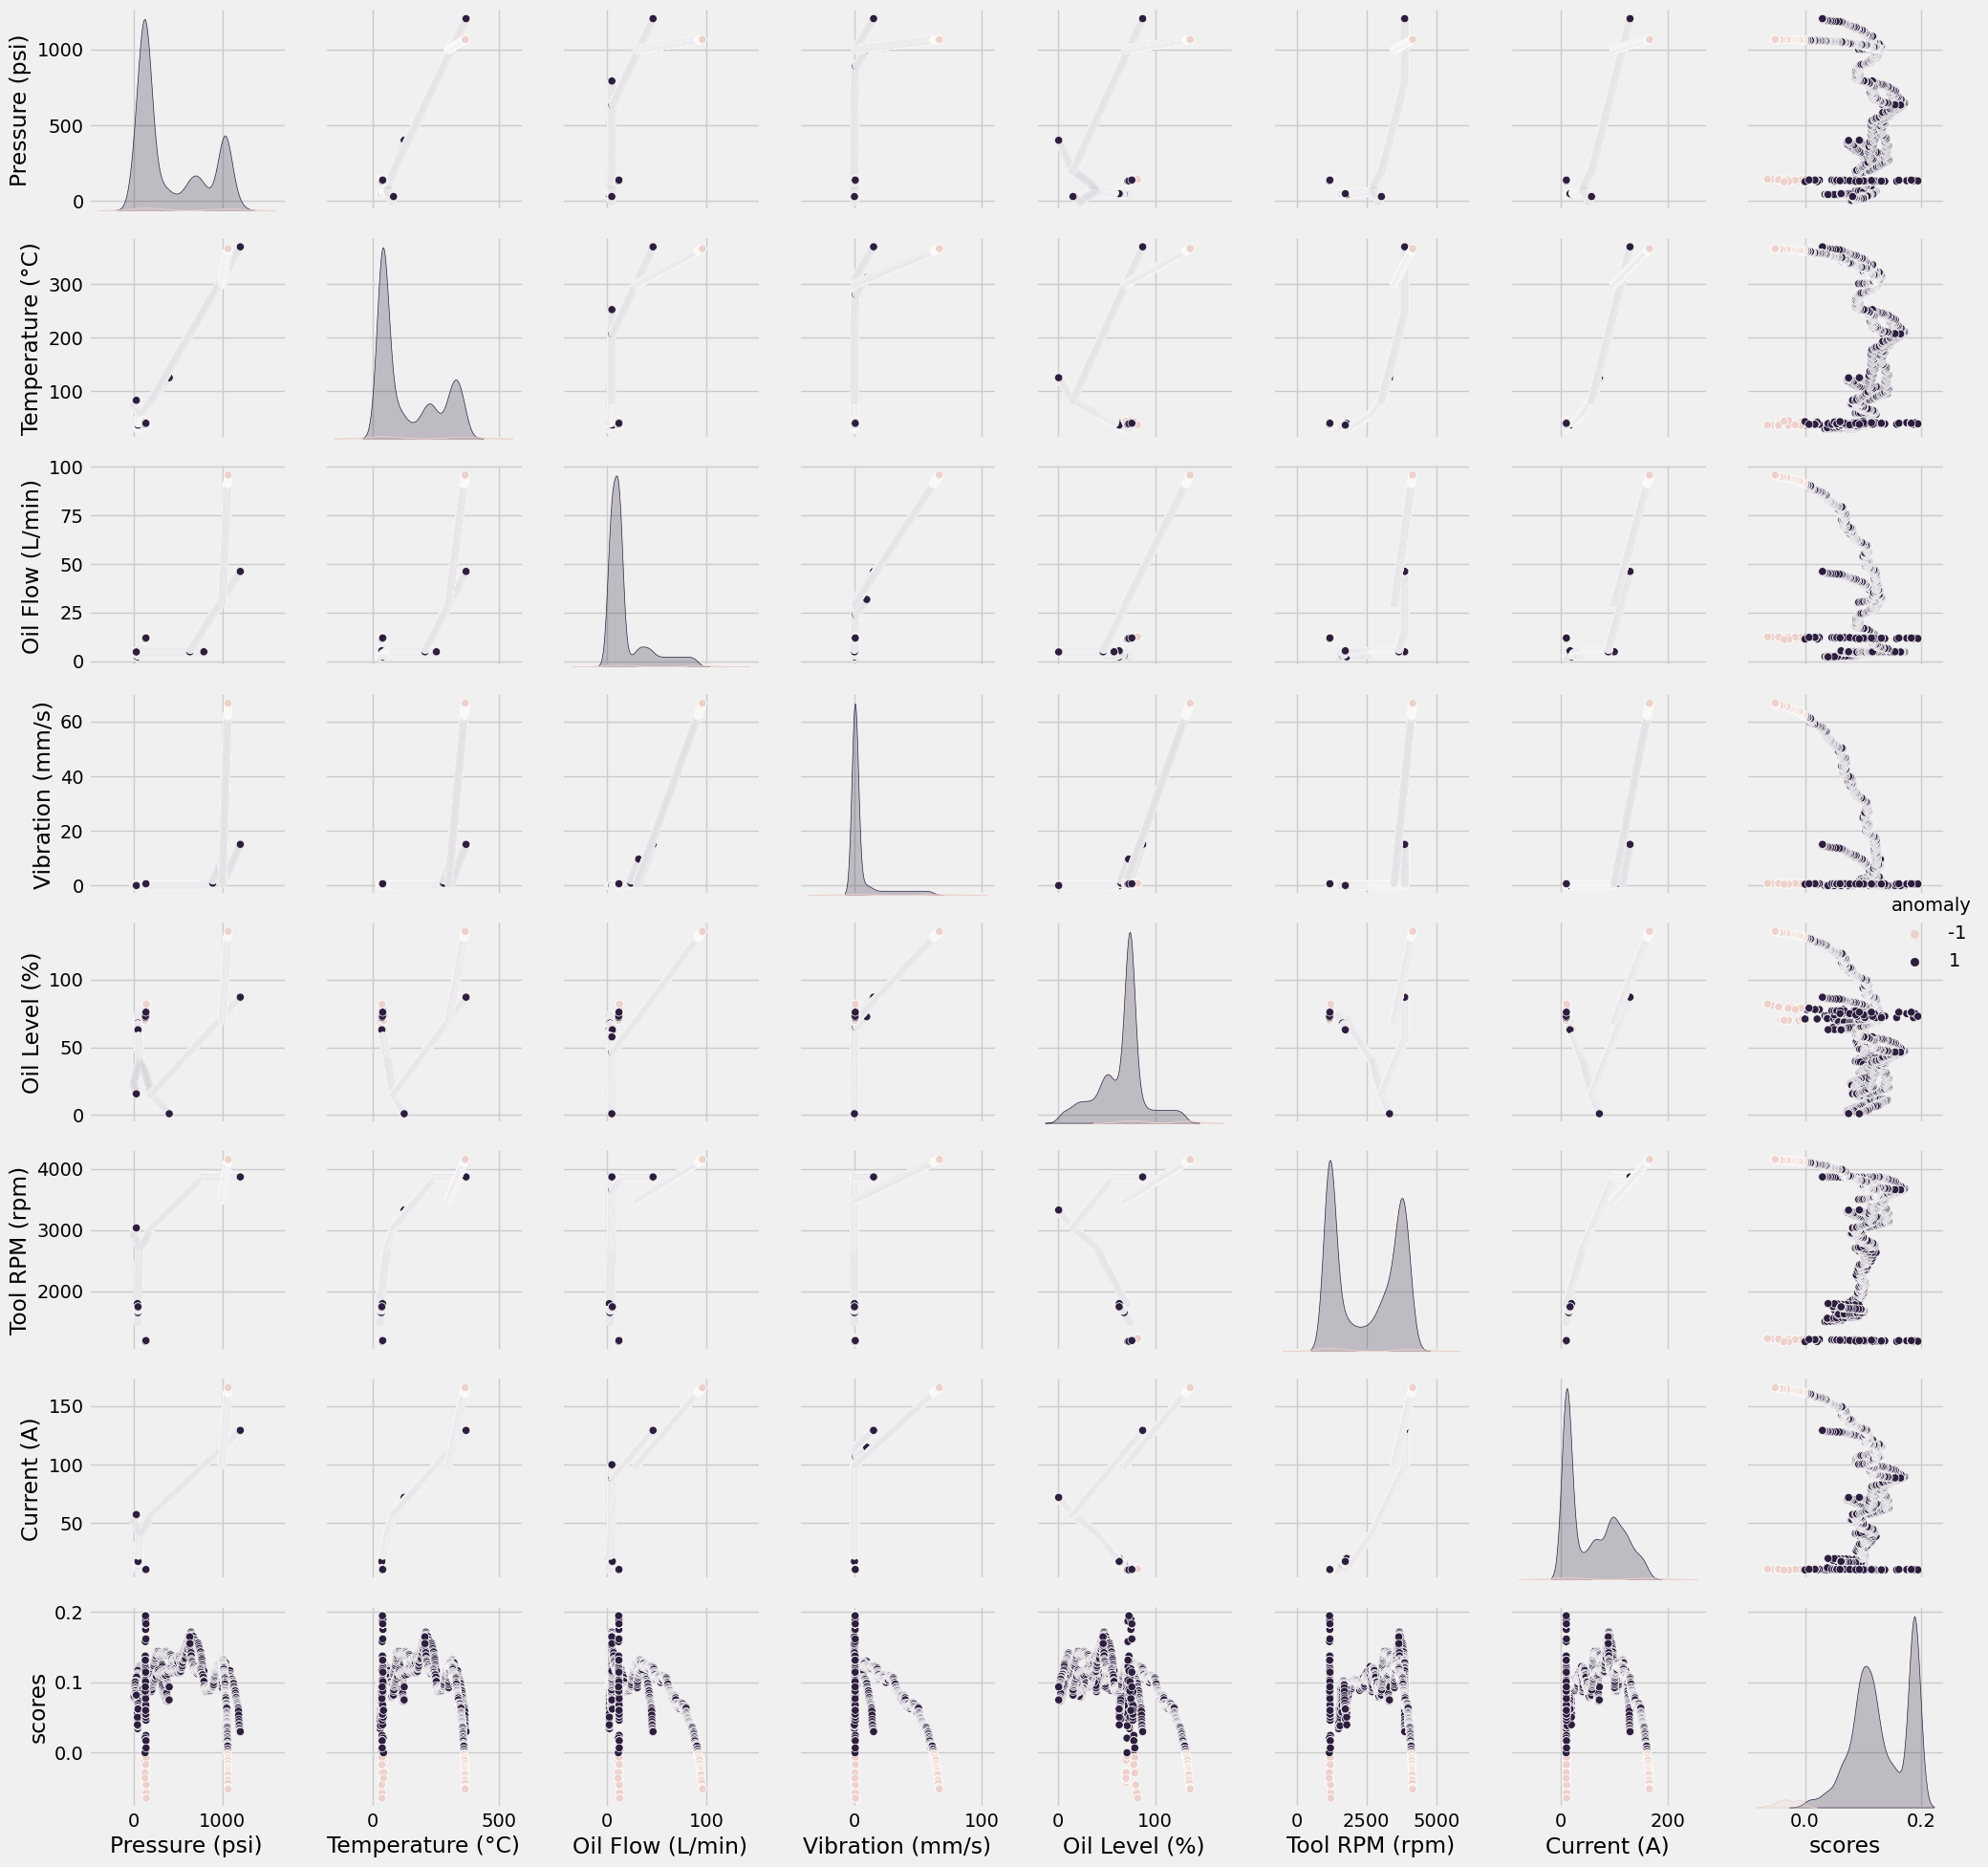

In [ ]:
#sns.pairplot(data,hue='anomaly')

In [ ]:
data.head()

,Timestamp,Pressure (psi),Temperature (°C),Oil Flow (L/min),Vibration (mm/s),Power Status,Oil Level (%),Tool RPM (rpm),Machine Status,Current (A),scores,anomaly
0,17-09-2023 00:00,45.2,29.8,2.4,0.021,ON,73.5,1505,Running,10.3,0.050897,1
1,17-09-2023 00:00,48.2,28.8,3.4,0.031,ON,70.5,1805,Running,11.3,0.093610,1
2,17-09-2023 00:01,45.1,29.9,2.5,0.022,ON,73.3,1508,Running,10.4,0.051545,1
3,17-09-2023 00:01,48.1,28.9,3.5,0.032,ON,70.3,1808,Running,11.4,0.093855,1
4,17-09-2023 00:02,45.3,30.0,2.6,0.023,ON,73.2,1512,Running,10.5,0.061148,1


In [ ]:
data['scores'].describe()

count    4002.000000
mean        0.136384
std         0.058163
min        -0.066493
25%         0.105159
50%         0.129728
75%         0.189207
max         0.208621
Name: scores, dtype: float64

In [ ]:
for i in range(len(data)):
    if (
        data.loc[i, 'scores'] >0.:
        data.loc[i, 'Machine Status'] = 'NotRunning'

c:\Users\moham\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


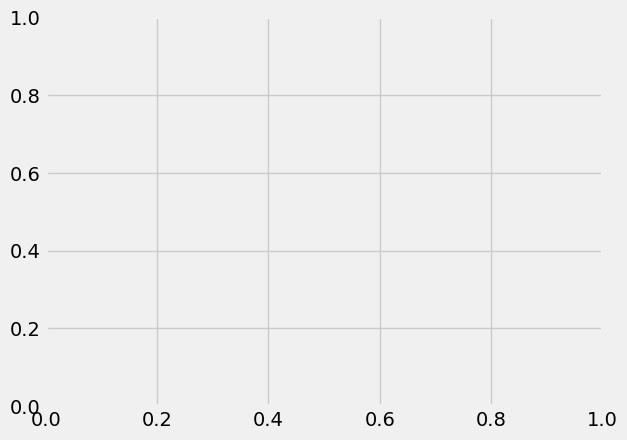

In [ ]:

# Initialize an empty DataFrame
df = pd.DataFrame(columns=["Timestamp", "Value"])

# Create a figure and axis
fig = plt.figure()
ax = fig.add_subplot(111)  # 111 means 1x1 grid, first subplot

# Function to read and append new data from the CSV file
def update_data(i):
    new_data = pd.read_csv("data.csv")
    df = pd.concat([df, new_data], ignore_index=True)
    ax.clear()  # Clear the previous plot
    ax.plot(df["Timestamp"], df["Tool RPM (rpm)"], label="Live Data")
    ax.set_xlabel("Timestamp")
    ax.set_ylabel("Value")
    ax.legend()

# Create an animation that calls the update_data function every second (adjust the interval as needed)
anim = FuncAnimation(fig, update_data, interval=1000,cache_frame_data=False)

plt.show()